In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Korea_Apt_Data/Final_1_24M_Training.csv')

In [3]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
0,0,0,89,81,47,43,73,57,19,23,90,87,79,61,11,10,10,8,29,26,27,26,33,31,31,30,88,80,32,30,67,44,2,6,97,96,91,56,3,2,...,67,66,64.0,7,6,7,7,84,88,88,83,52,52,53,55,95,96,98,98,70,70,68,71,35,35,37,38.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1168.195772
1,1,1,88,80,45,41,74,58,20,25,88,85,76,58,6,5,6,6,28,26,27,24,24,22,23,21,88,80,31,29,65,41,1,5,97,96,91,61,2,1,...,45,45,45.0,61,65,62,62,57,59,59,63,61,62,62,64,49,48,43,52,58,58,57,60,59,60,60,59.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1098.232220
2,2,2,88,79,43,39,76,60,22,27,86,83,73,54,4,3,4,4,99,98,98,99,0,0,0,0,88,79,29,25,63,39,1,2,97,96,91,62,2,1,...,0,0,0.0,88,93,97,97,61,63,64,64,99,99,99,99,24,21,19,33,98,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1028.147221
3,3,3,87,78,41,37,77,62,23,29,84,81,69,50,2,2,3,3,99,98,98,99,0,0,0,0,88,79,29,26,59,34,1,0,98,97,92,73,1,0,...,0,0,0.0,73,78,79,79,38,36,35,48,99,99,99,99,22,19,18,31,99,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-963.846075
4,4,4,86,77,39,35,79,65,26,32,79,76,64,43,1,1,2,2,86,87,86,87,2,2,2,1,88,79,30,28,62,37,1,0,98,97,92,67,5,3,...,5,5,3.0,81,86,89,89,21,18,16,38,95,95,94,96,9,7,6,14,92,93,92,94,96,97,96,97.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1026.067810


In [4]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [5]:
df.head(5)

,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,q_dong_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
0,89,81,47,43,73,57,19,23,90,87,79,61,11,10,10,8,29,26,27,26,33,31,31,30,88,80,32,30,67,44,2,6,97,96,91,56,3,2,1,10,...,67,66,64.0,7,6,7,7,84,88,88,83,52,52,53,55,95,96,98,98,70,70,68,71,35,35,37,38.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1168.195772
1,88,80,45,41,74,58,20,25,88,85,76,58,6,5,6,6,28,26,27,24,24,22,23,21,88,80,31,29,65,41,1,5,97,96,91,61,2,1,1,8,...,45,45,45.0,61,65,62,62,57,59,59,63,61,62,62,64,49,48,43,52,58,58,57,60,59,60,60,59.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1098.232220
2,88,79,43,39,76,60,22,27,86,83,73,54,4,3,4,4,99,98,98,99,0,0,0,0,88,79,29,25,63,39,1,2,97,96,91,62,2,1,1,7,...,0,0,0.0,88,93,97,97,61,63,64,64,99,99,99,99,24,21,19,33,98,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1028.147221
3,87,78,41,37,77,62,23,29,84,81,69,50,2,2,3,3,99,98,98,99,0,0,0,0,88,79,29,26,59,34,1,0,98,97,92,73,1,0,0,5,...,0,0,0.0,73,78,79,79,38,36,35,48,99,99,99,99,22,19,18,31,99,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-963.846075
4,86,77,39,35,79,65,26,32,79,76,64,43,1,1,2,2,86,87,86,87,2,2,2,1,88,79,30,28,62,37,1,0,98,97,92,67,5,3,3,12,...,5,5,3.0,81,86,89,89,21,18,16,38,95,95,94,96,9,7,6,14,92,93,92,94,96,97,96,97.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1026.067810


In [6]:
df

,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,q_dong_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
0,89,81,47,43,73,57,19,23,90,87,79,61,11,10,10,8,29,26,27,26,33,31,31,30,88,80,32,30,67,44,2,6,97,96,91,56,3,2,1,10,...,67,66,64.0,7,6,7,7,84,88,88,83,52,52,53,55,95,96,98,98,70,70,68,71,35,35,37,38.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1168.195772
1,88,80,45,41,74,58,20,25,88,85,76,58,6,5,6,6,28,26,27,24,24,22,23,21,88,80,31,29,65,41,1,5,97,96,91,61,2,1,1,8,...,45,45,45.0,61,65,62,62,57,59,59,63,61,62,62,64,49,48,43,52,58,58,57,60,59,60,60,59.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1098.232220
2,88,79,43,39,76,60,22,27,86,83,73,54,4,3,4,4,99,98,98,99,0,0,0,0,88,79,29,25,63,39,1,2,97,96,91,62,2,1,1,7,...,0,0,0.0,88,93,97,97,61,63,64,64,99,99,99,99,24,21,19,33,98,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1028.147221
3,87,78,41,37,77,62,23,29,84,81,69,50,2,2,3,3,99,98,98,99,0,0,0,0,88,79,29,26,59,34,1,0,98,97,92,73,1,0,0,5,...,0,0,0.0,73,78,79,79,38,36,35,48,99,99,99,99,22,19,18,31,99,99,99,99,99,99,99,99.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-963.846075
4,86,77,39,35,79,65,26,32,79,76,64,43,1,1,2,2,86,87,86,87,2,2,2,1,88,79,30,28,62,37,1,0,98,97,92,67,5,3,3,12,...,5,5,3.0,81,86,89,89,21,18,16,38,95,95,94,96,9,7,6,14,92,93,92,94,96,97,96,97.0,49,55,49,12.0,44,44,40,6.0,42,31,34,23.0,-1026.067810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
df.info

<bound method DataFrame.info of         q_all_sell_unit_price_danji  ...  sell_unit_price_sidanji_gap
0                                89  ...                 -1168.195772
1                                88  ...                 -1098.232220
2                                88  ...                 -1028.147221
3                                87  ...                  -963.846075
4                                86  ...                 -1026.067810
...                             ...  ...                          ...
119280                           36  ...                  1121.711177
119281                           35  ...                  1131.838882
119282                           38  ...                  1102.230279
119283                           41  ...                  1066.880415
119284                           45  ...                  1044.689640

[119285 rows x 253 columns]>

In [8]:
df.describe()

,q_all_sell_unit_price_danji,q_si_sell_unit_price_danji,q_gu_sell_unit_price_danji,q_dong_sell_unit_price_danji,q_all_rent_unit_price_danji,q_si_rent_unit_price_danji,q_gu_rent_unit_price_danji,q_dong_rent_unit_price_danji,q_all_rent_ratio_danji,q_si_rent_ratio_danji,q_gu_rent_ratio_danji,q_dong_rent_ratio_danji,q_all_sell_inc_ratio_1_danji,q_si_sell_inc_ratio_1_danji,q_gu_sell_inc_ratio_1_danji,q_dong_sell_inc_ratio_1_danji,q_all_rent_inc_ratio_1_danji,q_si_rent_inc_ratio_1_danji,q_gu_rent_inc_ratio_1_danji,q_dong_rent_inc_ratio_1_danji,q_all_rent_ratio_inc_ratio_1_danji,q_si_rent_ratio_inc_ratio_1_danji,q_gu_rent_ratio_inc_ratio_1_danji,q_dong_rent_ratio_inc_ratio_1_danji,q_all_sell_unit_price_dong,q_si_sell_unit_price_dong,q_gu_sell_unit_price_dong,q_dong_sell_unit_price_dong,q_all_rent_unit_price_dong,q_si_rent_unit_price_dong,q_gu_rent_unit_price_dong,q_dong_rent_unit_price_dong,q_all_rent_ratio_dong,q_si_rent_ratio_dong,q_gu_rent_ratio_dong,q_dong_rent_ratio_dong,q_all_sell_inc_ratio_1_dong,q_si_sell_inc_ratio_1_dong,q_gu_sell_inc_ratio_1_dong,q_dong_sell_inc_ratio_1_dong,...,q_si_rent_inc_ratio_1_dongdanji_gap,q_gu_rent_inc_ratio_1_dongdanji_gap,q_dong_rent_inc_ratio_1_dongdanji_gap,q_all_rent_ratio_inc_ratio_1_sigu_gap,q_si_rent_ratio_inc_ratio_1_sigu_gap,q_gu_rent_ratio_inc_ratio_1_sigu_gap,q_dong_rent_ratio_inc_ratio_1_sigu_gap,q_all_rent_ratio_inc_ratio_1_sidong_gap,q_si_rent_ratio_inc_ratio_1_sidong_gap,q_gu_rent_ratio_inc_ratio_1_sidong_gap,q_dong_rent_ratio_inc_ratio_1_sidong_gap,q_all_rent_ratio_inc_ratio_1_sidanji_gap,q_si_rent_ratio_inc_ratio_1_sidanji_gap,q_gu_rent_ratio_inc_ratio_1_sidanji_gap,q_dong_rent_ratio_inc_ratio_1_sidanji_gap,q_all_rent_ratio_inc_ratio_1_gudong_gap,q_si_rent_ratio_inc_ratio_1_gudong_gap,q_gu_rent_ratio_inc_ratio_1_gudong_gap,q_dong_rent_ratio_inc_ratio_1_gudong_gap,q_all_rent_ratio_inc_ratio_1_gudanji_gap,q_si_rent_ratio_inc_ratio_1_gudanji_gap,q_gu_rent_ratio_inc_ratio_1_gudanji_gap,q_dong_rent_ratio_inc_ratio_1_gudanji_gap,q_all_rent_ratio_inc_ratio_1_dongdanji_gap,q_si_rent_ratio_inc_ratio_1_dongdanji_gap,q_gu_rent_ratio_inc_ratio_1_dongdanji_gap,q_dong_rent_ratio_inc_ratio_1_dongdanji_gap,q_all_total_households,q_si_total_households,q_gu_total_households,q_dong_total_households,q_all_delta_days,q_si_delta_days,q_gu_delta_days,q_dong_delta_days,q_all_floor_area_ratio,q_si_floor_area_ratio,q_gu_floor_area_ratio,q_dong_floor_area_ratio,sell_unit_price_sidanji_gap
count,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,...,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000,119285.000000
mean,69.083062,54.313317,44.013019,43.595037,69.247097,55.716385,44.973601,44.546313,50.198089,48.573559,47.730570,47.324492,47.725313,45.404099,45.447198,45.321910,48.329337,47.924240,48.021436,48.031236,48.709461,47.358427,47.554252,47.479172,72.148359,55.851993,40.462472,39.005407,72.471317,57.053083,40.315849,39.072440,52.069514,48.570935,44.908295,41.512437,47.862715,42.869279,42.565218,42.042612,...,49.142507

In [ ]:
# sns.heatmap(df.isnull())

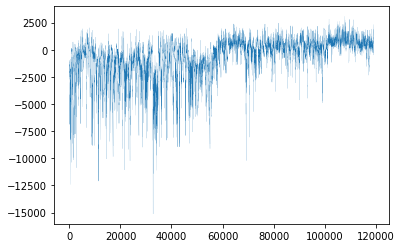

In [9]:
df['sell_unit_price_sidanji_gap'].plot(linewidth = 0.1)

In [10]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1:].values

In [11]:
X.shape

(119285, 252)

In [12]:
Y.shape

(119285, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
Y = scaler_Y.fit_transform(Y)
X = scaler_X.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [15]:
X_train.shape

(95428, 252)

In [16]:
X_test.shape

(23857, 252)

In [17]:
X_train

array([[0.75510204, 0.60606061, 0.67676768, ..., 0.44578313, 0.42168675,
        0.34722222],
       [0.36734694, 0.14141414, 0.32323232, ..., 0.21686747, 0.18072289,
        0.02777778],
       [0.89795918, 0.81818182, 0.88888889, ..., 0.85542169, 0.85542169,
        0.90277778],
       ...,
       [0.94897959, 0.90909091, 0.94949495, ..., 0.84337349, 0.8313253 ,
        0.86111111],
       [0.63265306, 0.42424242, 0.46464646, ..., 0.        , 0.        ,
        0.        ],
       [0.31632653, 0.1010101 , 0.22222222, ..., 0.78313253, 0.6746988 ,
        0.31944444]])

In [18]:
Y_train

array([[0.82092284],
       [0.94544997],
       [0.84828094],
       ...,
       [0.71173062],
       [0.84785699],
       [0.90721611]])

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (252, )))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               126500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 628,001
Trainable params: 628,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [22]:
epochs_hist = model.fit( X_train, Y_train, epochs = 20, batch_size = 50, validation_split= 0.2 )

Epoch 1/20
1527/1527 [==============================] - 7s 3ms/step - loss: 0.0035 - val_loss: 9.2511e-04
Epoch 2/20
1527/1527 [==============================] - 4s 3ms/step - loss: 8.3697e-04 - val_loss: 7.7158e-04
Epoch 3/20
1527/1527 [==============================] - 4s 3ms/step - loss: 7.3755e-04 - val_loss: 6.2769e-04
Epoch 4/20
1527/1527 [==============================] - 4s 3ms/step - loss: 6.9533e-04 - val_loss: 5.8584e-04
Epoch 5/20
1527/1527 [==============================] - 4s 3ms/step - loss: 6.5743e-04 - val_loss: 8.7870e-04
Epoch 6/20
1527/1527 [==============================] - 4s 3ms/step - loss: 6.0659e-04 - val_loss: 5.0003e-04
Epoch 7/20
1527/1527 [==============================] - 4s 3ms/step - loss: 5.9840e-04 - val_loss: 6.4201e-04
Epoch 8/20
1527/1527 [==============================] - 6s 4ms/step - loss: 5.6818e-04 - val_loss: 6.0075e-04
Epoch 9/20
1527/1527 [==============================] - 5s 3ms/step - loss: 5.4904e-04 - val_loss: 5.1499e-04
Epoch 10/20
15

In [23]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training and Validation Loss')

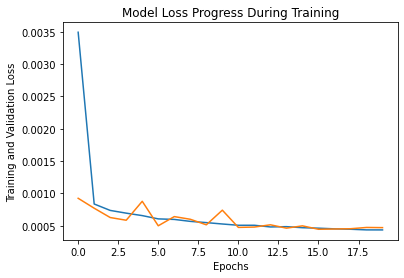

In [24]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')

Text(0, 0.5, 'True Values')

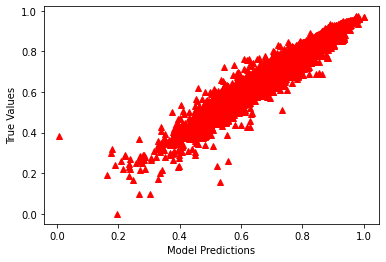

In [25]:
y_predict = model.predict(X_test)
plt.plot(Y_test, y_predict, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [26]:
 y_predict_orig = scaler_Y.inverse_transform(y_predict)

need two scaler

In [27]:
 y_test_orig = scaler_Y.inverse_transform(Y_test)

Text(0, 0.5, 'True Values')

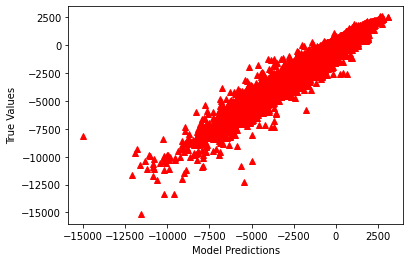

In [28]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')